In [226]:
import matplotlib.pyplot as plt
import numpy as nu
import json

data_file = open("datafile.json", "r")
data = json.load(data_file)
data_file.close()

In [227]:
def devitaion(x, vals):
    nums1 = [nu.square(val - x) for val in vals]
    num1 = nu.sum(nums1)
    num2 = num1 / len(vals)
    
    result = nu.sqrt(num2)
    return result

def graph_lines_stable(data: dict):
    fig, ax = plt.subplots()

    for experiment in data["experiments"]:
        y = [imp / 100 for imp in experiment["imprints"][0]]
        plt.plot(y, experiment["stables"][0], alpha=0.8)

    plt.title(f"stable imprints vs number of imprints")
    plt.xlabel("Number of Imprints")
    plt.ylabel("Stable imprints")
    plt.savefig(f"figs/stable.pdf")

def graph_line_stable(data: dict):
    fig, ax = plt.subplots()
    big_boy = []
    bigger_boy = []
    boy = []
    x_ax = []
    for i in range(50):
        x = 0
        vals = []
        for j in range(4):
            x += data["experiments"][j]["stables"][0][i]
            vals.append(data["experiments"][j]["stables"][0][i])

        x /= 4
        standard = devitaion(x, vals)
        
        bigger_boy.append(x + standard)
        boy.append(x - standard)

        big_boy.append(x)
        x_ax.append(i)
    

    plt.plot(x_ax, big_boy, alpha=1)
    plt.fill_between(x_ax, bigger_boy, boy, alpha=0.5)

    plt.title(f"stable imprints vs number of imprints")
    plt.xlabel("Number of Imprints")
    plt.ylabel("Stable imprints")
    plt.savefig(f"figs/stable_big.pdf")

def graph_line_unstable(data: dict):
    fig, ax = plt.subplots()
    big_boy = []
    bigger_boy = []
    boy = []
    x_ax = []
    for i in range(50):
        x = 0
        vals = []
        for j in range(4):
            x += ((i+1) - data["experiments"][j]["stables"][0][i]) / (i + 1)
            vals.append(((i+1) - data["experiments"][j]["stables"][0][i]) / (i + 1))
        
        x_ax.append(i)
        big_boy.append(x)
        standard = devitaion(x, vals)

        bigger_boy.append(x + standard)
        print(vals, standard)
        boy.append(x - standard)

    plt.plot(x_ax, big_boy)
    plt.fill_between(x_ax, bigger_boy, boy, alpha=0.5)

    plt.title(f"Ratio of unstable imprints vs number of imprints")
    plt.xlabel("Number of Imprints")
    plt.ylabel("Ratio of unstable imprints")
    plt.savefig(f"figs/unstable_big.pdf")

def graph_lines_unstable(data: dict):
    fig, ax = plt.subplots()

    for experiment in data["experiments"]:
        x = [imp / 100 for imp in experiment["imprints"][0]]
        y = [((i+1) - stab) / (i+1) for i, stab in enumerate(experiment["stables"][0])]
        plt.plot(x, y, alpha=0.8)

    plt.title(f"Ratio of unstable imprints vs number of imprints")
    plt.xlabel("Number of Imprints")
    plt.ylabel("Ratio of unstable imprints")
    plt.savefig(f"figs/unstable.pdf")

def graph_basin_of_attraction(data: dict):
    markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
    fig, ax = plt.subplots()
    mark = 0
    p = 2
    

    for line in data:
        if len(line.keys()) % 2 != 0:
            continue
        y = [line[bas] for bas in line.keys()]
        y = [(y.count(x), x) for x in y]
        y = list(set(y))

        x = [val[0] for val in y]
        x_len = sum(x)
        x = [val / x_len for val in x]
        y = [val[1] for val in y]
        vals = []
        for i in range(51):
            if i in y:
                index = y.index(i)
                tup = (i, x[index])
            else:
                tup = (i, 0)

            vals.append(tup)
    
        plt.plot(*zip(*vals), marker=markers[(mark % len(markers))], label=f"p{p}", alpha=0.8)
        mark += 1
        p += 2

    plt.title(f"Ratio of Occurance of Basins of attractions")
    plt.xlabel("Basin Value")
    plt.ylabel("Ratio of Occurance")
    plt.legend(ncol=5)
    plt.savefig(f"figs/basin.pdf")

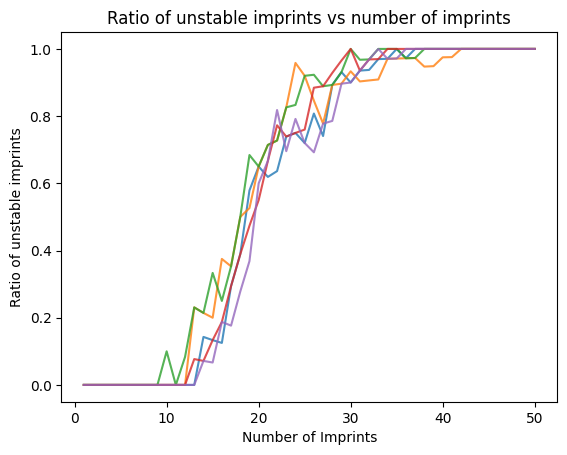

In [228]:
graph_lines_unstable(data)

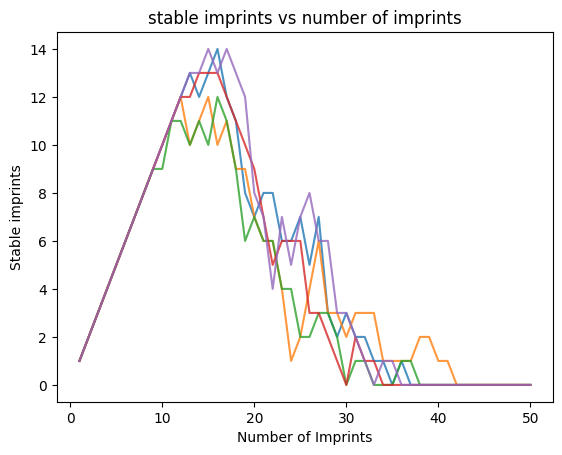

In [229]:
graph_lines_stable(data)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
9.75
11.0
11.75
11.25
11.75
12.0
12.25
11.5
10.0
8.25
7.5
6.75
6.25
5.0
4.25
4.25
3.5
4.75
2.75
2.0
1.25
2.0
1.75
1.25
0.5
0.25
0.75
0.5
0.5
0.5
0.25
0.25
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


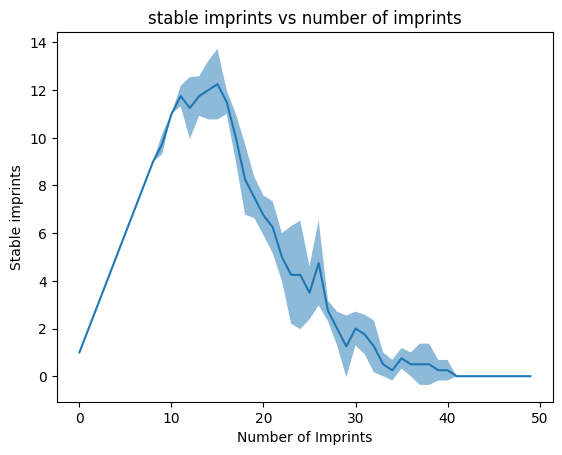

In [230]:
graph_line_stable(data)

[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.1, 0.0] 0.08660254037844388
[0.0, 0.0, 0.0, 0.0] 0.0
[0.0, 0.0, 0.08333333333333333, 0.0] 0.07216878364870322
[0.0, 0.23076923076923078, 0.23076923076923078, 0.07692307692307693] 0.4160251471689219
[0.14285714285714285, 0.21428571428571427, 0.21428571428571427, 0.07142857142857142] 0.4857668038834086
[0.13333333333333333, 0.2, 0.3333333333333333, 0.13333333333333333] 0.6055300708194985
[0.125, 0.375, 0.25, 0.1875] 0.7091753573693885
[0.29411764705882354, 0.35294117647058826, 0.35294117647058826, 0.29411764705882354] 0.9710337658364222
[0.3888888888888889, 0.5, 0.5, 0.3888888888888889] 1.334490238829368
[0.5789473684210527, 0.5263157894736842, 0.6842105263157895, 0.47368421052631576] 1.6991524691955715
[0.65, 0.65, 0.65, 0.55] 1.8754999333511053
[0.6190

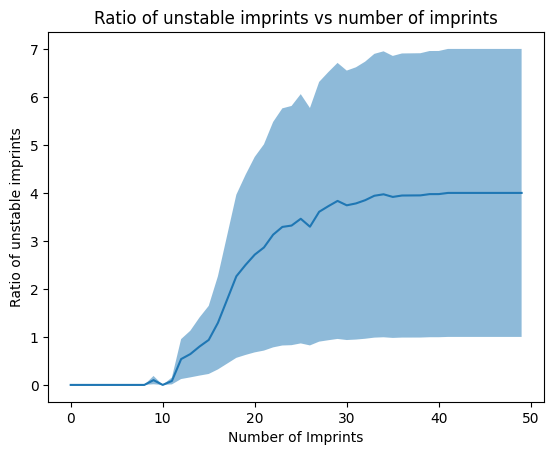

In [231]:
graph_line_unstable(data)

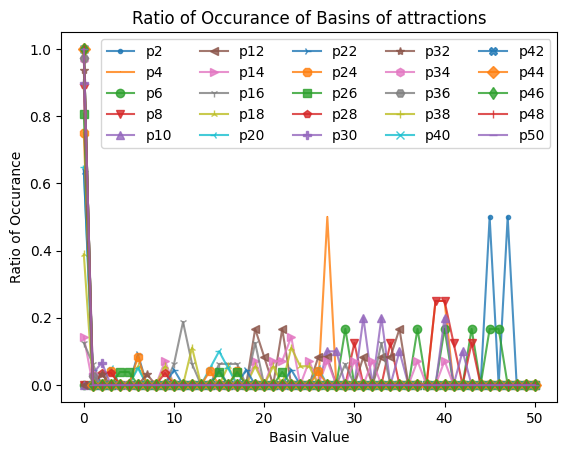

In [232]:
test = data["experiments"][0]["basins"][0]
graph_basin_of_attraction(test)